Missing values in the dataset:
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


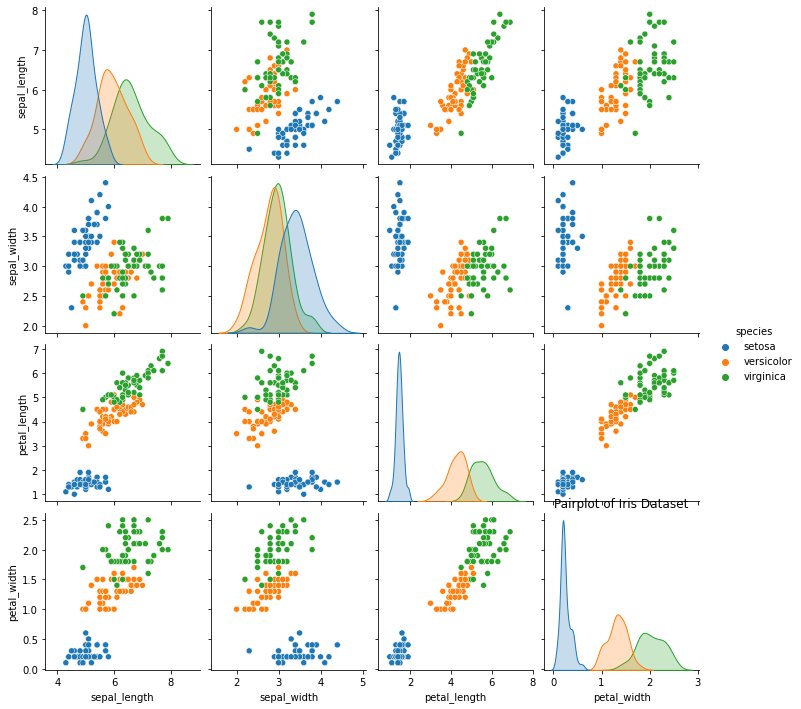

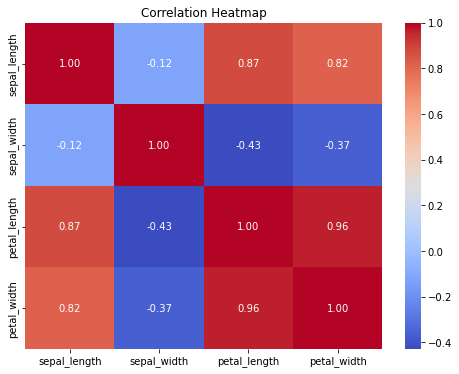

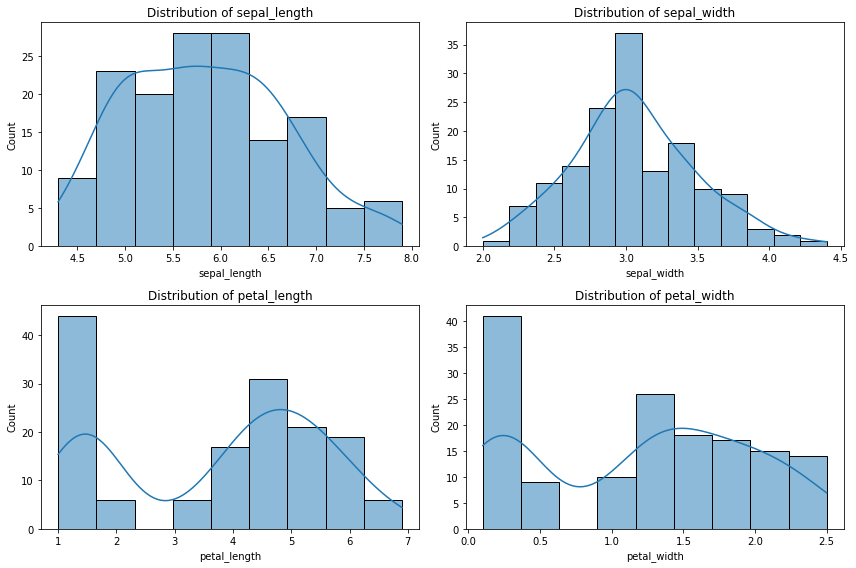

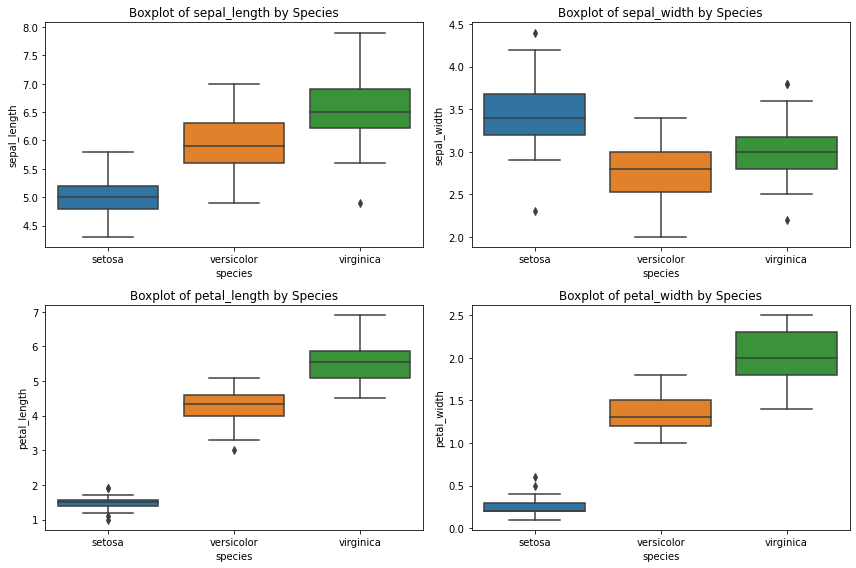

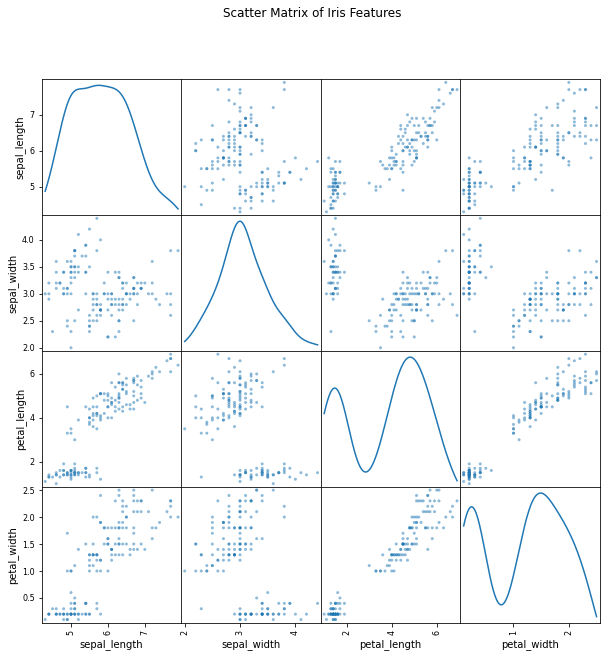


Correlation Insights:
              sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.117570      0.871754     0.817941
sepal_width      -0.117570     1.000000     -0.428440    -0.366126
petal_length      0.871754    -0.428440      1.000000     0.962865
petal_width       0.817941    -0.366126      0.962865     1.000000
EDA report has been saved as 'eda_report.pdf'.


<Figure size 864x576 with 0 Axes>

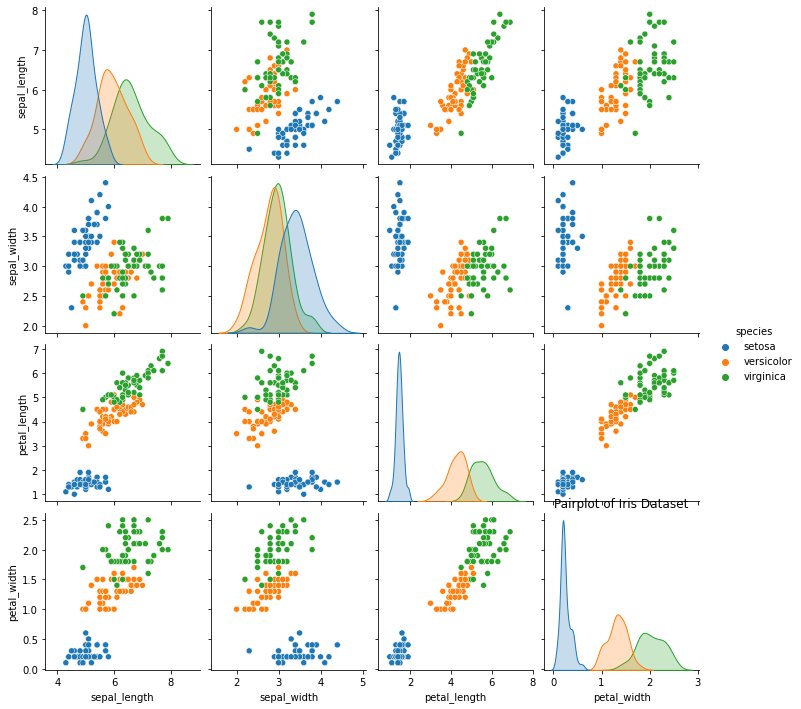

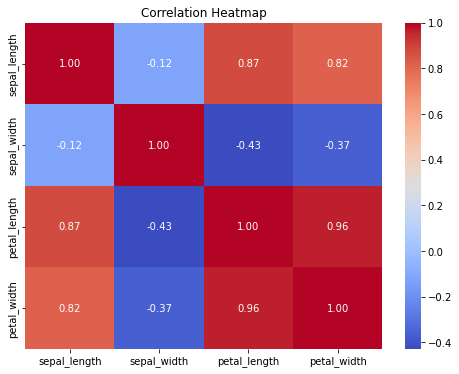

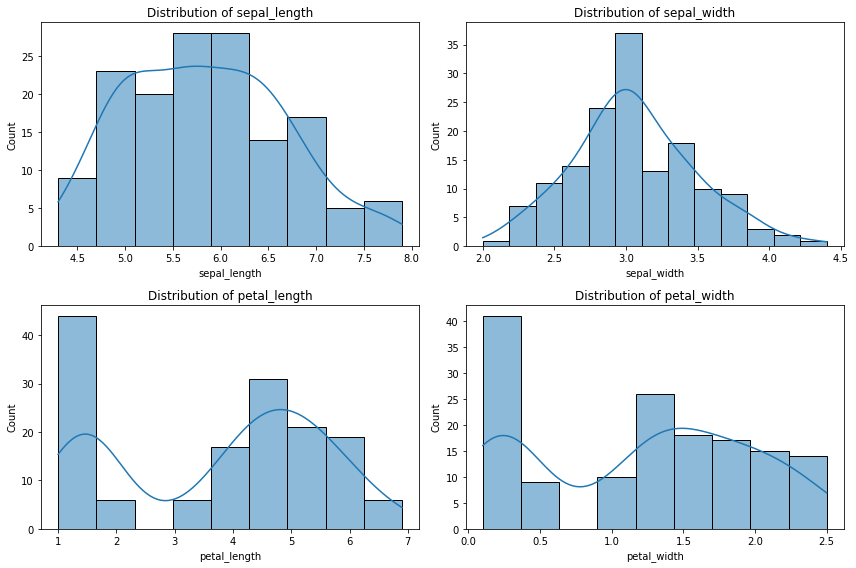

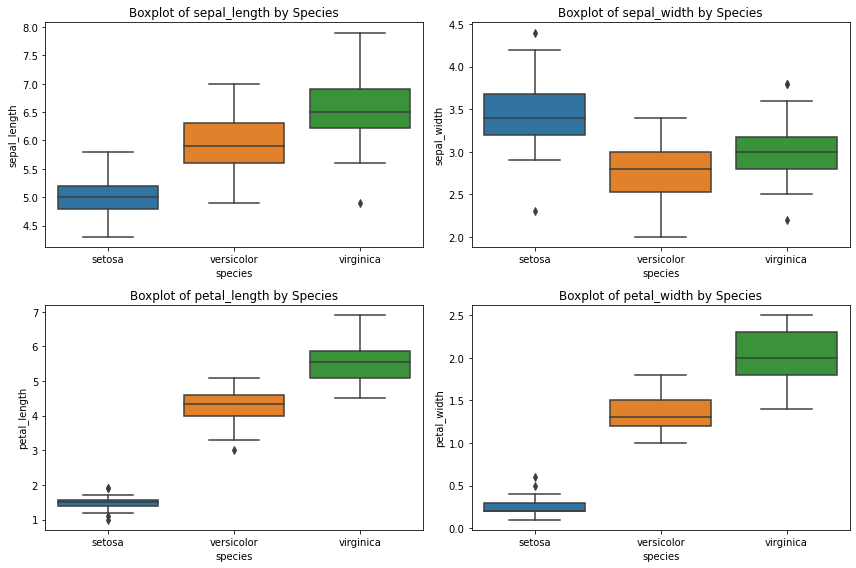

<Figure size 720x720 with 0 Axes>

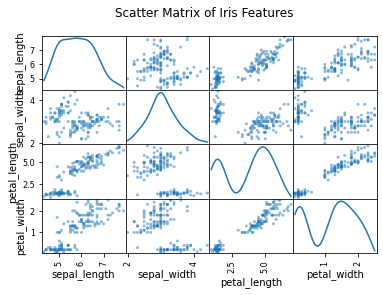

In [1]:
# Importing necessary libraries
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import numpy as np
import matplotlib.backends.backend_pdf

# Loading Iris dataset from seaborn
df = sns.load_dataset('iris')

# Data Cleaning: Checking for missing values
print("Missing values in the dataset:")
print(df.isnull().sum())

# No missing values found, proceed to EDA

# 1. Visualizations

# a. Pairplot to visualize relationships between features
sns.pairplot(df, hue="species", diag_kind='kde')
plt.title("Pairplot of Iris Dataset")
plt.show()

# b. Correlation heatmap (excluding the non-numeric 'species' column)
numeric_columns = df.select_dtypes(include=[np.number])  # Select only numeric columns
correlation_matrix = numeric_columns.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

# c. Distribution plots for each feature
df_features = df.drop('species', axis=1)  # Remove the target column
plt.figure(figsize=(12, 8))
for i, column in enumerate(df_features.columns):
    plt.subplot(2, 2, i + 1)
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

# d. Boxplot to visualize outliers for each feature
plt.figure(figsize=(12, 8))
for i, column in enumerate(df_features.columns):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x='species', y=column, data=df)
    plt.title(f'Boxplot of {column} by Species')
plt.tight_layout()
plt.show()

# e. Scatter matrix to show pairwise relationships
scatter_matrix(df_features, figsize=(10, 10), diagonal='kde')
plt.suptitle("Scatter Matrix of Iris Features")
plt.show()

# 2. Generate Insights
print("\nCorrelation Insights:")
print(correlation_matrix)

# The correlation matrix gives us insight into how features are related.
# For example, petal_length and petal_width have a strong positive correlation (close to 1).

# 3. Exporting the EDA results as a PDF report

# Create a PDF to store the visualizations
pdf_pages = matplotlib.backends.backend_pdf.PdfPages('eda_report.pdf')

# Save the pairplot
plt.figure(figsize=(12, 8))
sns.pairplot(df, hue="species", diag_kind='kde')
plt.title("Pairplot of Iris Dataset")
pdf_pages.savefig()  # Save current figure to PDF

# Save the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt='.2f')
plt.title("Correlation Heatmap")
pdf_pages.savefig()

# Save the distribution plots
plt.figure(figsize=(12, 8))
for i, column in enumerate(df_features.columns):
    plt.subplot(2, 2, i + 1)
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
pdf_pages.savefig()

# Save the boxplot
plt.figure(figsize=(12, 8))
for i, column in enumerate(df_features.columns):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x='species', y=column, data=df)
    plt.title(f'Boxplot of {column} by Species')
plt.tight_layout()
pdf_pages.savefig()

# Save the scatter matrix
plt.figure(figsize=(10, 10))
scatter_matrix(df_features, diagonal='kde')
plt.suptitle("Scatter Matrix of Iris Features")
pdf_pages.savefig()

# Close the PDF
pdf_pages.close()

print("EDA report has been saved as 'eda_report.pdf'.")